In [9]:
import pandas as pd
import folium

Координаты Московии 55°45′21″ с. ш. 37°37′04″ в. д.

In [14]:
df = pd.read_json(r'data-28509-2021-07-11.json', encoding='cp1251')
df10 = df[0:10]
df100 = df[0:100]
df500 = df[0:500]

In [3]:
districts = df.groupby('District')
#print(districts.groups.keys())
num_of_districts = districts.ngroups


NameError: name 'df' is not defined

In [13]:
moskow_map = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")


for row in df100.itertuples():
    latitude = row[1]
    longitude = row[2]
    #name = row[6]
    
    folium.CircleMarker(location=[latitude, longitude],
                        radius=5,
                        fill=True).add_to(moskow_map)
    
    # folium.Marker(location=[latitude, longitude], 
    #           icon=folium.DivIcon(
    #               icon_size=(160, 20),
    #               html='''<div style="
    #               font-size: 12pt;
    #               font-family: serif;
    #               color: blue; 
    #               text-align: left;
    #               ">''' + name + '''</div>''')
    #          ).add_to(moskow_map)


moskow_map


In [1]:
import osmnx as ox

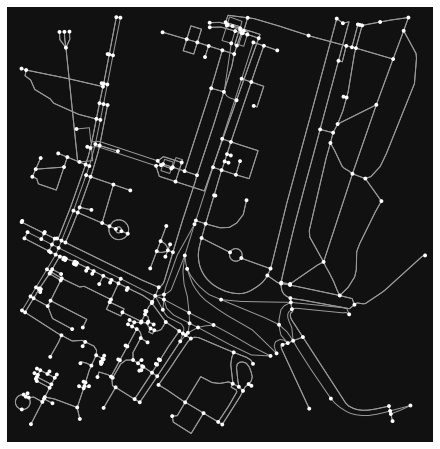

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
G = ox.graph_from_point((55.75, 37.61), dist=250, network_type='all')
ox.plot_graph(G)

In [13]:
moskow_map_net = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")
ox.folium.plot_graph_folium(G, moskow_map_net)
moskow_map_net


networkx.classes.multidigraph.MultiDiGraph

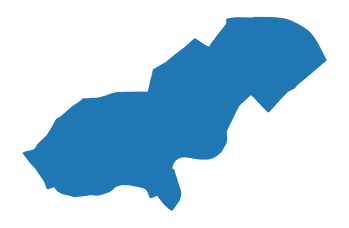

In [28]:
gdf = ox.geocode_to_gdf('Basmanny , Moskow, Russia')
ax = ox.project_gdf(gdf).plot()
_ = ax.axis('off')

In [17]:
import geopandas as gpd

In [26]:
moskow_map_districts = folium.Map(location=[55.75, 37.61],
                        zoom_start=11,
                        tiles="Stamen Toner")

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})    
    geo_j.add_to(moskow_map_districts)
    
moskow_map_districts